In [1]:
import pandas as pd
from pandas import Timestamp
import numpy as np
from operator import itemgetter
from datetime import datetime
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_excel('/Users/francesco/git/housing-in-london/Data Sets/lsoa.xlsx', 
                            sheet_name='median_house_price_updated')

In [3]:
df.head()

,LSOA code,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,Year ending Dec 1997,...,Year ending Sep 2018,Year ending Dec 2018,Year ending Mar 2019,Year ending Jun 2019,Year ending Sep 2019,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101
0,E01011949,34750,34500,30500,30000,29950,29000,30000,33950,31975,...,77500,77500,73250,77500,77500,NaN,NaN,NaN,NaN,NaN
1,E01011950,25000,25000,25300,25625,25000,24800,20500,21250,21000,...,30000,28000,28000,29500,27000,NaN,NaN,NaN,NaN,NaN
2,E01011951,27000,27000,27250,28950,28500,28950,28000,26250,26625,...,49000,50000,50000,46250,42800,NaN,NaN,NaN,NaN,NaN
3,E01011952,44500,44500,30000,26675,26000,25500,25500,25000,23000,...,57000,58000,70000,70000,70000,NaN,NaN,NaN,NaN,NaN
4,E01011953,22000,27000,27000,20600,20000,19500,19500,18000,23000,...,50000,68000,66000,59000,62000,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(34753, 102)

In [5]:
df.drop(list(df.filter(regex = 'Unnamed')), axis = 1, inplace = True)

In [6]:
df.shape

(34753, 97)

In [7]:
dates = []
for i in range(1996, 2020):
    for j in range(1, 5):
        date = str(i) + '-' + 'Q' + str(j)
        dates.append(date)

In [8]:
dates.insert(0, '1995-Q4')
dates.pop()

'2019-Q4'

In [9]:
df.head()

,LSOA code,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,Year ending Dec 1997,...,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017,Year ending Mar 2018,Year ending Jun 2018,Year ending Sep 2018,Year ending Dec 2018,Year ending Mar 2019,Year ending Jun 2019,Year ending Sep 2019
0,E01011949,34750,34500,30500,30000,29950,29000,30000,33950,31975,...,99950,92000,88500,85000,88000,77500,77500,73250,77500,77500
1,E01011950,25000,25000,25300,25625,25000,24800,20500,21250,21000,...,35000,35000,31475,30475,30000,30000,28000,28000,29500,27000
2,E01011951,27000,27000,27250,28950,28500,28950,28000,26250,26625,...,55500,50000,48000,44499.5,44500,49000,50000,50000,46250,42800
3,E01011952,44500,44500,30000,26675,26000,25500,25500,25000,23000,...,68500,68500,74000,65750,63000,57000,58000,70000,70000,70000
4,E01011953,22000,27000,27000,20600,20000,19500,19500,18000,23000,...,55000,55000,47500,50000,62500,50000,68000,66000,59000,62000


In [10]:
df.set_index('LSOA code', inplace=True)
df.index.name = None
df.head()

,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,Year ending Dec 1997,Year ending Mar 1998,...,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017,Year ending Mar 2018,Year ending Jun 2018,Year ending Sep 2018,Year ending Dec 2018,Year ending Mar 2019,Year ending Jun 2019,Year ending Sep 2019
E01011949,34750,34500,30500,30000,29950,29000,30000,33950,31975,33950,...,99950,92000,88500,85000,88000,77500,77500,73250,77500,77500
E01011950,25000,25000,25300,25625,25000,24800,20500,21250,21000,22000,...,35000,35000,31475,30475,30000,30000,28000,28000,29500,27000
E01011951,27000,27000,27250,28950,28500,28950,28000,26250,26625,27500,...,55500,50000,48000,44499.5,44500,49000,50000,50000,46250,42800
E01011952,44500,44500,30000,26675,26000,25500,25500,25000,23000,23000,...,68500,68500,74000,65750,63000,57000,58000,70000,70000,70000
E01011953,22000,27000,27000,20600,20000,19500,19500,18000,23000,32000,...,55000,55000,47500,50000,62500,50000,68000,66000,59000,62000


In [11]:
df.columns = dates
df.head()

,1995-Q4,1996-Q1,1996-Q2,1996-Q3,1996-Q4,1997-Q1,1997-Q2,1997-Q3,1997-Q4,1998-Q1,...,2017-Q2,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3
E01011949,34750,34500,30500,30000,29950,29000,30000,33950,31975,33950,...,99950,92000,88500,85000,88000,77500,77500,73250,77500,77500
E01011950,25000,25000,25300,25625,25000,24800,20500,21250,21000,22000,...,35000,35000,31475,30475,30000,30000,28000,28000,29500,27000
E01011951,27000,27000,27250,28950,28500,28950,28000,26250,26625,27500,...,55500,50000,48000,44499.5,44500,49000,50000,50000,46250,42800
E01011952,44500,44500,30000,26675,26000,25500,25500,25000,23000,23000,...,68500,68500,74000,65750,63000,57000,58000,70000,70000,70000
E01011953,22000,27000,27000,20600,20000,19500,19500,18000,23000,32000,...,55000,55000,47500,50000,62500,50000,68000,66000,59000,62000


In [12]:
df_internet = pd.read_excel('/Users/francesco/git/housing-in-london/Data Sets/lsoa.xlsx', 
                            sheet_name='internet_use')

In [13]:
df_internet.head()

,lsoa_code,LSOA11NM,LAD11NM,supergroup_code,supergroup_name,internet,group_name
0,E01000001,City of London 001A,City of London,2,E-professionals and Students,2b,Totally Connected
1,E01000002,City of London 001B,City of London,2,E-professionals and Students,2b,Totally Connected
2,E01000003,City of London 001C,City of London,2,E-professionals and Students,2b,Totally Connected
3,E01000005,City of London 001E,City of London,2,E-professionals and Students,2a,Next Generation Users
4,E01032739,City of London 001F,City of London,2,E-professionals and Students,2b,Totally Connected


In [14]:
df_internet.LAD11NM.value_counts()

Croydon                   220
Barnet                    211
Bromley                   197
Ealing                    196
Enfield                   183
Wandsworth                179
Lambeth                   178
Brent                     173
Lewisham                  169
Southwark                 166
Newham                    164
Hillingdon                161
Redbridge                 161
Greenwich                 151
Havering                  150
Bexley                    146
Haringey                  145
Hackney                   144
Waltham Forest            144
Tower Hamlets             144
Hounslow                  142
Harrow                    137
Camden                    133
Westminster               128
Merton                    124
Islington                 123
Sutton                    121
Richmond upon Thames      115
Hammersmith and Fulham    113
Barking and Dagenham      110
Kensington and Chelsea    103
Kingston upon Thames       98
City of London              6
Name: LAD1

In [15]:
df_internet_final = df_internet[['lsoa_code']].set_index('lsoa_code')
df_internet_final.index.name = None

In [16]:
df_internet_final.head()

""
E01000001
E01000002
E01000003
E01000005
E01032739


In [17]:
df_internet_final.shape

(4835, 0)

In [18]:
df_internet_final

""
E01000001
E01000002
E01000003
E01000005
E01032739
...
E01033604
E01033605
E01033606
E01033607


In [19]:
df_med = pd.merge(df_internet_final, df, left_index=True, right_index=True)
print(df_med.shape)
df_med.head()

(4835, 96)


,1995-Q4,1996-Q1,1996-Q2,1996-Q3,1996-Q4,1997-Q1,1997-Q2,1997-Q3,1997-Q4,1998-Q1,...,2017-Q2,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4,2019-Q1,2019-Q2,2019-Q3
E01000001,108500,119500,121250,133750,150000,141750,151000,140000,146000,150000,...,907500,950000,935000,920000,920000,850000,834750,815000,847500,887500
E01000002,113500,129000,114000,132000,122500,120000,122500,125000,130000,146000,...,875000,850000,849950,835000,810000,807500,830000,835000,857500,880000
E01000003,74000,74000,79000,79000,76000,107892,120000,127500,135000,122090,...,750000,751000,760000,750000,730000,690500,651000,599500,599000,575000
E01000005,:,55000,57850,57850,56425,57000,54500,55000,57000,65000,...,520000,:,:,:,:,:,:,:,:,:
E01032739,148000,178750,175000,175000,158750,150000,150000,144000,128000,186925,...,581250,567500,570250,577500,903750,927500,941160,964500,941160,996075


In [20]:
df_med.shape

(4835, 96)

In [21]:
df_med = df_med.T
df_med.head()

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033599,E01033600,E01033601,E01033602,E01033603,E01033604,E01033605,E01033606,E01033607,E01033608
1995-Q4,108500,113500,74000,:,148000,86500,68500,:,:,53000,...,:,130000,80000,73500,82000,:,62300,125000,117000,142162
1996-Q1,119500,129000,74000,55000,178750,115000,66000,:,:,53000,...,:,190000,80000,67000,74500,:,62300,107500,119000,144325
1996-Q2,121250,114000,79000,57850,175000,115000,67000,:,:,54500,...,:,220000,82500,57000,70000,:,62300,129950,120000,154000
1996-Q3,133750,132000,79000,57850,175000,139000,67000,:,:,54250,...,:,220000,120000,57000,70000,74750,60000,129950,180000,160000
1996-Q4,150000,122500,76000,56425,158750,125000,69500,:,:,50000,...,:,220000,120000,57000,73875,81000,66500,140250,212500,163000


In [22]:
df_med.index = pd.PeriodIndex(df_med.index, freq='Q').to_timestamp()
df_med.head()

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033599,E01033600,E01033601,E01033602,E01033603,E01033604,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500,113500,74000,:,148000,86500,68500,:,:,53000,...,:,130000,80000,73500,82000,:,62300,125000,117000,142162
1996-01-01,119500,129000,74000,55000,178750,115000,66000,:,:,53000,...,:,190000,80000,67000,74500,:,62300,107500,119000,144325
1996-04-01,121250,114000,79000,57850,175000,115000,67000,:,:,54500,...,:,220000,82500,57000,70000,:,62300,129950,120000,154000
1996-07-01,133750,132000,79000,57850,175000,139000,67000,:,:,54250,...,:,220000,120000,57000,70000,74750,60000,129950,180000,160000
1996-10-01,150000,122500,76000,56425,158750,125000,69500,:,:,50000,...,:,220000,120000,57000,73875,81000,66500,140250,212500,163000


In [23]:
df_med.replace(':', np.nan, inplace=True)

In [24]:
df_med.isnull().sum().sort_values(ascending=False)[0:50]

E01002904    96
E01002907    96
E01003968    90
E01002857    88
E01004088    88
E01002089    86
E01003974    84
E01000955    83
E01003912    81
E01003252    80
E01003486    78
E01002545    76
E01004040    76
E01000599    75
E01001746    73
E01003971    72
E01000954    72
E01002842    72
E01003044    71
E01002673    71
E01001713    70
E01004739    70
E01003245    69
E01003244    69
E01002082    69
E01000552    68
E01000048    67
E01000151    67
E01001885    67
E01001510    67
E01004335    65
E01000051    65
E01001057    64
E01000949    64
E01000061    64
E01001710    63
E01004248    62
E01000605    62
E01004011    62
E01004459    60
E01000941    60
E01002588    60
E01004007    59
E01003970    59
E01003111    59
E01002853    59
E01001220    59
E01000422    58
E01000604    58
E01003989    58
dtype: int64

In [25]:
df_med.shape

(96, 4835)

In [26]:
df_med.dropna(thresh = 0.7*len(df_med), axis=1, inplace=True)
df_med.shape

(96, 4645)

In [27]:
df_med.head()

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033597,E01033598,E01033600,E01033601,E01033602,E01033603,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,NaN,148000.0,86500.0,68500.0,NaN,NaN,53000.0,...,NaN,NaN,130000.0,80000.0,73500.0,82000.0,62300.0,125000,117000,142162.5
1996-01-01,119500.0,129000.0,74000.0,55000.0,178750.0,115000.0,66000.0,NaN,NaN,53000.0,...,NaN,NaN,190000.0,80000.0,67000.0,74500.0,62300.0,107500,119000,144325.0
1996-04-01,121250.0,114000.0,79000.0,57850.0,175000.0,115000.0,67000.0,NaN,NaN,54500.0,...,NaN,NaN,220000.0,82500.0,57000.0,70000.0,62300.0,129950,120000,154000.0
1996-07-01,133750.0,132000.0,79000.0,57850.0,175000.0,139000.0,67000.0,NaN,NaN,54250.0,...,NaN,NaN,220000.0,120000.0,57000.0,70000.0,60000.0,129950,180000,160000.0
1996-10-01,150000.0,122500.0,76000.0,56425.0,158750.0,125000.0,69500.0,NaN,NaN,50000.0,...,42500.0,NaN,220000.0,120000.0,57000.0,73875.0,66500.0,140250,212500,163000.0


In [28]:
df_med.isnull().sum().value_counts()

0     3274
1      299
2      220
3      125
4       92
5       75
6       65
8       51
7       45
10      44
13      37
9       36
12      32
11      29
16      26
14      25
17      25
15      23
18      17
19      14
26      13
23      13
20      12
27      12
22      12
21      10
25       8
24       6
28       5
dtype: int64

In [29]:
df_med.head()

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033597,E01033598,E01033600,E01033601,E01033602,E01033603,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,NaN,148000.0,86500.0,68500.0,NaN,NaN,53000.0,...,NaN,NaN,130000.0,80000.0,73500.0,82000.0,62300.0,125000,117000,142162.5
1996-01-01,119500.0,129000.0,74000.0,55000.0,178750.0,115000.0,66000.0,NaN,NaN,53000.0,...,NaN,NaN,190000.0,80000.0,67000.0,74500.0,62300.0,107500,119000,144325.0
1996-04-01,121250.0,114000.0,79000.0,57850.0,175000.0,115000.0,67000.0,NaN,NaN,54500.0,...,NaN,NaN,220000.0,82500.0,57000.0,70000.0,62300.0,129950,120000,154000.0
1996-07-01,133750.0,132000.0,79000.0,57850.0,175000.0,139000.0,67000.0,NaN,NaN,54250.0,...,NaN,NaN,220000.0,120000.0,57000.0,70000.0,60000.0,129950,180000,160000.0
1996-10-01,150000.0,122500.0,76000.0,56425.0,158750.0,125000.0,69500.0,NaN,NaN,50000.0,...,42500.0,NaN,220000.0,120000.0,57000.0,73875.0,66500.0,140250,212500,163000.0


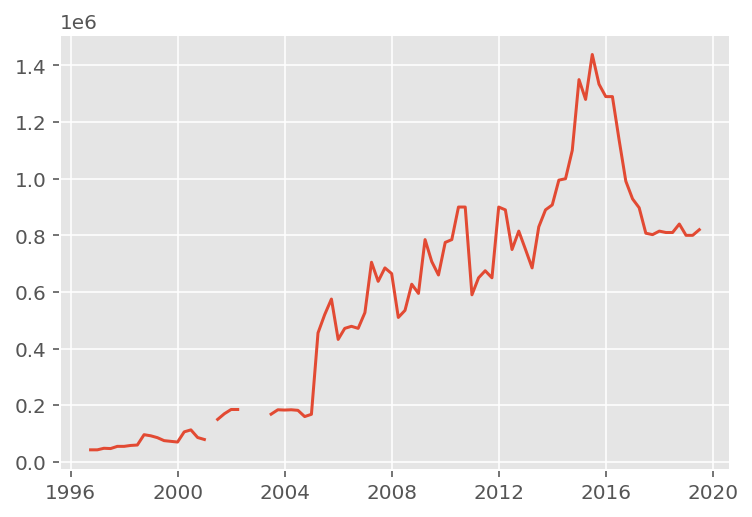

In [30]:
plt.plot(df_med.index, df_med['E01033597'])
plt.show();

In [825]:
df_med

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033597,E01033598,E01033600,E01033601,E01033602,E01033603,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,NaN,148000.0,86500.0,68500.0,NaN,NaN,53000.0,...,NaN,NaN,130000.0,80000.0,73500.0,82000.0,62300.0,125000,117000,142162.5
1996-01-01,119500.0,129000.0,74000.0,55000.0,178750.0,115000.0,66000.0,NaN,NaN,53000.0,...,NaN,NaN,190000.0,80000.0,67000.0,74500.0,62300.0,107500,119000,144325.0
1996-04-01,121250.0,114000.0,79000.0,57850.0,175000.0,115000.0,67000.0,NaN,NaN,54500.0,...,NaN,NaN,220000.0,82500.0,57000.0,70000.0,62300.0,129950,120000,154000.0
1996-07-01,133750.0,132000.0,79000.0,57850.0,175000.0,139000.0,67000.0,NaN,NaN,54250.0,...,NaN,NaN,220000.0,120000.0,57000.0,70000.0,60000.0,129950,180000,160000.0
1996-10-01,150000.0,122500.0,76000.0,56425.0,158750.0,125000.0,69500.0,NaN,NaN,50000.0,...,42500.0,NaN,220000.0,120000.0,57000.0,73875.0,66500.0,140250,212500,163000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,850000.0,807500.0,690500.0,NaN,927500.0,987000.0,385000.0,240000.0,212000.0,217500.0,...,810000.0,NaN,897500.0,NaN,NaN,585000.0,NaN,696000,670000,1040000.0
2018-10-01,834750.0,830000.0,651000.0,NaN,941160.0,1255500.0,365000.0,235000.0,209000.0,200000.0,...,840000.0,NaN,897500.0,NaN,NaN,505000.0,NaN,610000,712500,980000.0
2019-01-01,815000.0,835000.0,599500.0,NaN,964500.0,1277750.0,282000.0,226500.0,NaN,195000.0,...,800000.0,NaN,887500.0,NaN,NaN,730000.0,NaN,652500,637500,680000.0
2019-04-01,847500.0,857500.0,599000.0,NaN,941160.0,1339500.0,205000.0,207500.0,215000.0,195000.0,...,800000.0,NaN,1101250.0,NaN,NaN,730000.0,NaN,652500,4230000,NaN


In [1477]:
df_med_int = df_med.interpolate(method='time', limit_area='inside')
df_med_int


,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033597,E01033598,E01033600,E01033601,E01033602,E01033603,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,NaN,148000.0,86500.0,68500.0,NaN,NaN,53000.0,...,NaN,NaN,130000.0,80000.000000,73500.0,82000.0,62300.0,125000,117000,1.421625e+05
1996-01-01,119500.0,129000.0,74000.0,55000.0,178750.0,115000.0,66000.0,NaN,NaN,53000.0,...,NaN,NaN,190000.0,80000.000000,67000.0,74500.0,62300.0,107500,119000,1.443250e+05
1996-04-01,121250.0,114000.0,79000.0,57850.0,175000.0,115000.0,67000.0,NaN,NaN,54500.0,...,NaN,NaN,220000.0,82500.000000,57000.0,70000.0,62300.0,129950,120000,1.540000e+05
1996-07-01,133750.0,132000.0,79000.0,57850.0,175000.0,139000.0,67000.0,NaN,NaN,54250.0,...,NaN,NaN,220000.0,120000.000000,57000.0,70000.0,60000.0,129950,180000,1.600000e+05
1996-10-01,150000.0,122500.0,76000.0,56425.0,158750.0,125000.0,69500.0,NaN,NaN,50000.0,...,42500.0,NaN,220000.0,120000.000000,57000.0,73875.0,66500.0,140250,212500,1.630000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,850000.0,807500.0,690500.0,NaN,927500.0,987000.0,385000.0,240000.0,212000.000000,217500.0,...,810000.0,NaN,897500.0,662308.075773,NaN,585000.0,NaN,696000,670000,1.040000e+06
2018-10-01,834750.0,830000.0,651000.0,NaN,941160.0,1255500.0,365000.0,235000.0,209000.000000,200000.0,...,840000.0,NaN,897500.0,650383.848455,NaN,505000.0,NaN,610000,712500,9.800000e+05
2019-01-01,815000.0,835000.0,599500.0,NaN,964500.0,1277750.0,282000.0,226500.0,212032.967033,195000.0,...,800000.0,NaN,887500.0,638459.621137,NaN,730000.0,NaN,652500,637500,6.800000e+05
2019-04-01,847500.0,857500.0,599000.0,NaN,941160.0,1339500.0,205000.0,207500.0,215000.000000,195000.0,...,800000.0,NaN,1101250.0,626794.616152,NaN,730000.0,NaN,652500,4230000,6.402210e+05


In [1478]:
df_med_int = df_med_int.interpolate(method='time', limit_area='outside', limit_direction='backward', limit=1)
df_med_int

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033597,E01033598,E01033600,E01033601,E01033602,E01033603,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,55000.0,148000.0,86500.0,68500.0,NaN,NaN,53000.0,...,NaN,NaN,130000.0,80000.000000,73500.0,82000.0,62300.0,125000,117000,1.421625e+05
1996-01-01,119500.0,129000.0,74000.0,55000.0,178750.0,115000.0,66000.0,NaN,NaN,53000.0,...,NaN,NaN,190000.0,80000.000000,67000.0,74500.0,62300.0,107500,119000,1.443250e+05
1996-04-01,121250.0,114000.0,79000.0,57850.0,175000.0,115000.0,67000.0,NaN,NaN,54500.0,...,NaN,NaN,220000.0,82500.000000,57000.0,70000.0,62300.0,129950,120000,1.540000e+05
1996-07-01,133750.0,132000.0,79000.0,57850.0,175000.0,139000.0,67000.0,NaN,NaN,54250.0,...,42500.0,NaN,220000.0,120000.000000,57000.0,70000.0,60000.0,129950,180000,1.600000e+05
1996-10-01,150000.0,122500.0,76000.0,56425.0,158750.0,125000.0,69500.0,NaN,NaN,50000.0,...,42500.0,300000.0,220000.0,120000.000000,57000.0,73875.0,66500.0,140250,212500,1.630000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,850000.0,807500.0,690500.0,NaN,927500.0,987000.0,385000.0,240000.0,212000.000000,217500.0,...,810000.0,NaN,897500.0,662308.075773,NaN,585000.0,NaN,696000,670000,1.040000e+06
2018-10-01,834750.0,830000.0,651000.0,NaN,941160.0,1255500.0,365000.0,235000.0,209000.000000,200000.0,...,840000.0,NaN,897500.0,650383.848455,NaN,505000.0,NaN,610000,712500,9.800000e+05
2019-01-01,815000.0,835000.0,599500.0,NaN,964500.0,1277750.0,282000.0,226500.0,212032.967033,195000.0,...,800000.0,NaN,887500.0,638459.621137,NaN,730000.0,NaN,652500,637500,6.800000e+05
2019-04-01,847500.0,857500.0,599000.0,NaN,941160.0,1339500.0,205000.0,207500.0,215000.000000,195000.0,...,800000.0,NaN,1101250.0,626794.616152,NaN,730000.0,NaN,652500,4230000,6.402210e+05


In [1479]:
df_med_int.isnull().sum().value_counts()

0     4155
1      129
2       74
3       67
4       54
6       31
5       28
8       19
7       17
9       11
13      11
11      11
12      10
10       9
15       3
14       3
22       3
16       2
26       2
19       1
20       1
17       1
21       1
18       1
25       1
dtype: int64

In [1480]:
df_med_int = df_med_int.interpolate(method='time', limit_area='outside', limit_direction='forward', limit=1)
df_med_int.head()

,E01000001,E01000002,E01000003,E01000005,E01032739,E01032740,E01000006,E01000007,E01000008,E01000009,...,E01033597,E01033598,E01033600,E01033601,E01033602,E01033603,E01033605,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,55000.0,148000.0,86500.0,68500.0,NaN,NaN,53000.0,...,NaN,NaN,130000.0,80000.0,73500.0,82000.0,62300.0,125000,117000,142162.5
1996-01-01,119500.0,129000.0,74000.0,55000.0,178750.0,115000.0,66000.0,NaN,NaN,53000.0,...,NaN,NaN,190000.0,80000.0,67000.0,74500.0,62300.0,107500,119000,144325.0
1996-04-01,121250.0,114000.0,79000.0,57850.0,175000.0,115000.0,67000.0,NaN,NaN,54500.0,...,NaN,NaN,220000.0,82500.0,57000.0,70000.0,62300.0,129950,120000,154000.0
1996-07-01,133750.0,132000.0,79000.0,57850.0,175000.0,139000.0,67000.0,NaN,NaN,54250.0,...,42500.0,NaN,220000.0,120000.0,57000.0,70000.0,60000.0,129950,180000,160000.0
1996-10-01,150000.0,122500.0,76000.0,56425.0,158750.0,125000.0,69500.0,NaN,NaN,50000.0,...,42500.0,300000.0,220000.0,120000.0,57000.0,73875.0,66500.0,140250,212500,163000.0


In [1481]:
df_med_int.isnull().sum().value_counts()

0     4262
1       79
2       65
3       56
4       36
5       30
6       21
7       20
10      12
8       11
9       11
12       9
11       8
13       7
15       3
14       3
22       3
18       2
26       2
17       1
25       1
20       1
16       1
21       1
dtype: int64

In [1482]:
df_med_int.shape

(96, 4645)

In [1483]:
df_med_int.dropna(axis=1, inplace=True)

In [1484]:
df_med_int.isnull().sum().value_counts()

0    4262
dtype: int64

In [1485]:
df_med_int.shape

(96, 4262)

In [1486]:
df_med_int.tail()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
2018-07-01,850000.0,807500.0,690500.0,927500.0,987000.0,385000.0,217500.0,227500.0,218750.0,315000.0,...,1650000.0,1235000.0,4052560.0,1050000.0,897500.0,662308.075773,585000.0,696000,670000,1.040000e+06
2018-10-01,834750.0,830000.0,651000.0,941160.0,1255500.0,365000.0,200000.0,228750.0,212500.0,315000.0,...,1455000.0,1195000.0,2525000.0,1050000.0,897500.0,650383.848455,505000.0,610000,712500,9.800000e+05
2019-01-01,815000.0,835000.0,599500.0,964500.0,1277750.0,282000.0,195000.0,226250.0,228750.0,306000.0,...,1595000.0,1385000.0,2300000.0,1011000.0,887500.0,638459.621137,730000.0,652500,637500,6.800000e+05
2019-04-01,847500.0,857500.0,599000.0,941160.0,1339500.0,205000.0,195000.0,223000.0,230000.0,305000.0,...,1037500.0,1250000.0,1235000.0,1011000.0,1101250.0,626794.616152,730000.0,652500,4230000,6.402210e+05
2019-07-01,887500.0,880000.0,575000.0,996075.0,990000.0,292500.0,195000.0,215000.0,230000.0,313250.0,...,1253500.0,1385000.0,1685000.0,600000.0,725000.0,615000.000000,520918.5,652500,4450000,6.000000e+05


In [1183]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    
    p = adf['p-value']
    if p <= signif:
        return(f"Series is Stationary")
    else:
        return(f"Series is Non-Stationary")
    

In [1184]:
stat_list = []

for i in df_med_int.columns:
    stat_list.append(adf_test(df_med_int[f'{i}']))


In [1185]:
len(stat_list)

4262

In [1186]:
stat_list[0:10]

['Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary',
 'Series is Non-Stationary']

In [1187]:
stat_list.count('Series is Stationary')

5

In [1188]:
df_med_int.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,148000.0,86500.0,68500.0,53000.0,55625.0,33750.0,44000.0,...,110000.0,166000.0,125000.0,172500.0,130000.0,80000.0,82000.0,125000,117000,142162.5
1996-01-01,119500.0,129000.0,74000.0,178750.0,115000.0,66000.0,53000.0,56625.0,32350.0,42500.0,...,120500.0,152000.0,117500.0,155000.0,190000.0,80000.0,74500.0,107500,119000,144325.0
1996-04-01,121250.0,114000.0,79000.0,175000.0,115000.0,67000.0,54500.0,52500.0,33000.0,42250.0,...,126500.0,166000.0,143750.0,147500.0,220000.0,82500.0,70000.0,129950,120000,154000.0
1996-07-01,133750.0,132000.0,79000.0,175000.0,139000.0,67000.0,54250.0,57975.0,33500.0,40500.0,...,147500.0,96050.0,163250.0,128500.0,220000.0,120000.0,70000.0,129950,180000,160000.0
1996-10-01,150000.0,122500.0,76000.0,158750.0,125000.0,69500.0,50000.0,52500.0,33000.0,42750.0,...,155000.0,114000.0,164000.0,117500.0,220000.0,120000.0,73875.0,140250,212500,163000.0


In [1189]:
r0 = df_med_int.iloc[0]
r0

E01000001    108500.0
E01000002    113500.0
E01000003     74000.0
E01032739    148000.0
E01032740     86500.0
               ...   
E01033601     80000.0
E01033603     82000.0
E01033606    125000.0
E01033607    117000.0
E01033608    142162.5
Name: 1995-10-01 00:00:00, Length: 4262, dtype: float64

In [1487]:
# 1st difference
df_med_int_differenced = df_med_int.diff().dropna()

In [1488]:
df_med_int_differenced.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-01-01,11000.0,15500.0,0.0,30750.0,28500.0,-2500.0,0.0,1000.0,-1400.0,-1500.0,...,10500.0,-14000.0,-7500.0,-17500.0,60000.0,0.0,-7500.0,-17500.0,2000.0,2162.5
1996-04-01,1750.0,-15000.0,5000.0,-3750.0,0.0,1000.0,1500.0,-4125.0,650.0,-250.0,...,6000.0,14000.0,26250.0,-7500.0,30000.0,2500.0,-4500.0,22450.0,1000.0,9675.0
1996-07-01,12500.0,18000.0,0.0,0.0,24000.0,0.0,-250.0,5475.0,500.0,-1750.0,...,21000.0,-69950.0,19500.0,-19000.0,0.0,37500.0,0.0,0.0,60000.0,6000.0
1996-10-01,16250.0,-9500.0,-3000.0,-16250.0,-14000.0,2500.0,-4250.0,-5475.0,-500.0,2250.0,...,7500.0,17950.0,750.0,-11000.0,0.0,0.0,3875.0,10300.0,32500.0,3000.0
1997-01-01,-8250.0,-2500.0,31892.5,-8750.0,-9000.0,-18000.0,6995.0,-3500.0,1000.0,2250.0,...,-25000.0,2000.0,31000.0,8500.0,-9250.0,-27500.0,49375.0,-5900.0,52500.0,27000.0


In [1192]:
stat_list_diff = []

for i in df_med_int_differenced.columns:
#     print(i)
    stat_list_diff.append(adf_test(df_med_int_differenced[f'{i}']))

In [1193]:
len(stat_list_diff)

4262

In [1194]:
stat_list_diff[0:10]

['Series is Stationary',
 'Series is Stationary',
 'Series is Non-Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary']

In [1195]:
stat_list_diff.count('Series is Stationary')

3841

In [1196]:
df_med_int_differenced.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-01-01,11000.0,15500.0,0.0,30750.0,28500.0,-2500.0,0.0,1000.0,-1400.0,-1500.0,...,10500.0,-14000.0,-7500.0,-17500.0,60000.0,0.0,-7500.0,-17500.0,2000.0,2162.5
1996-04-01,1750.0,-15000.0,5000.0,-3750.0,0.0,1000.0,1500.0,-4125.0,650.0,-250.0,...,6000.0,14000.0,26250.0,-7500.0,30000.0,2500.0,-4500.0,22450.0,1000.0,9675.0
1996-07-01,12500.0,18000.0,0.0,0.0,24000.0,0.0,-250.0,5475.0,500.0,-1750.0,...,21000.0,-69950.0,19500.0,-19000.0,0.0,37500.0,0.0,0.0,60000.0,6000.0
1996-10-01,16250.0,-9500.0,-3000.0,-16250.0,-14000.0,2500.0,-4250.0,-5475.0,-500.0,2250.0,...,7500.0,17950.0,750.0,-11000.0,0.0,0.0,3875.0,10300.0,32500.0,3000.0
1997-01-01,-8250.0,-2500.0,31892.5,-8750.0,-9000.0,-18000.0,6995.0,-3500.0,1000.0,2250.0,...,-25000.0,2000.0,31000.0,8500.0,-9250.0,-27500.0,49375.0,-5900.0,52500.0,27000.0


In [1197]:
r1 = df_med_int_differenced.iloc[0]
r1

E01000001    11000.0
E01000002    15500.0
E01000003        0.0
E01032739    30750.0
E01032740    28500.0
              ...   
E01033601        0.0
E01033603    -7500.0
E01033606   -17500.0
E01033607     2000.0
E01033608     2162.5
Name: 1996-01-01 00:00:00, Length: 4262, dtype: float64

In [1489]:
# 2st difference
df_med_int_differenced_2 = df_med_int.diff().diff().dropna()

In [1199]:
stat_list_diff_2 = []

for i in df_med_int.columns:
#     print(i)
    stat_list_diff_2.append(adf_test(df_med_int_differenced_2[f'{i}']))
    

In [1200]:
len(stat_list_diff_2)

4262

In [1201]:
stat_list_diff_2[0:10]

['Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary',
 'Series is Stationary']

In [1202]:
stat_list_diff_2.count('Series is Stationary')

4197

In [1203]:
df_med_int_differenced_2.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-04-01,-9250.0,-30500.0,5000.0,-34500.0,-28500.0,3500.0,1500.0,-5125.0,2050.0,1250.0,...,-4500.0,28000.0,33750.0,10000.0,-30000.0,2500.0,3000.0,39950.0,-1000.0,7512.5
1996-07-01,10750.0,33000.0,-5000.0,3750.0,24000.0,-1000.0,-1750.0,9600.0,-150.0,-1500.0,...,15000.0,-83950.0,-6750.0,-11500.0,-30000.0,35000.0,4500.0,-22450.0,59000.0,-3675.0
1996-10-01,3750.0,-27500.0,-3000.0,-16250.0,-38000.0,2500.0,-4000.0,-10950.0,-1000.0,4000.0,...,-13500.0,87900.0,-18750.0,8000.0,0.0,-37500.0,3875.0,10300.0,-27500.0,-3000.0
1997-01-01,-24500.0,7000.0,34892.5,7500.0,5000.0,-20500.0,11245.0,1975.0,1500.0,0.0,...,-32500.0,-15950.0,30250.0,19500.0,-9250.0,-27500.0,45500.0,-16200.0,20000.0,24000.0
1997-04-01,17500.0,5000.0,-19785.0,8750.0,20500.0,13247.5,-13990.0,7500.0,-1000.0,1000.0,...,19000.0,84500.0,19000.0,-9500.0,-36550.0,18000.0,-75875.0,-3450.0,-65000.0,-23000.0


In [1490]:
diff_columns = [i for i, j in enumerate(stat_list_diff_2) if j == 'Series is Stationary']

In [1491]:
len(diff_columns)

4197

In [1492]:
df_med_int_diff = df_med_int_differenced_2.iloc[:, diff_columns]

In [1493]:
df_med_int_diff.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-04-01,-9250.0,-30500.0,5000.0,-34500.0,-28500.0,3500.0,1500.0,-5125.0,2050.0,1250.0,...,-4500.0,28000.0,33750.0,10000.0,-30000.0,2500.0,3000.0,39950.0,-1000.0,7512.5
1996-07-01,10750.0,33000.0,-5000.0,3750.0,24000.0,-1000.0,-1750.0,9600.0,-150.0,-1500.0,...,15000.0,-83950.0,-6750.0,-11500.0,-30000.0,35000.0,4500.0,-22450.0,59000.0,-3675.0
1996-10-01,3750.0,-27500.0,-3000.0,-16250.0,-38000.0,2500.0,-4000.0,-10950.0,-1000.0,4000.0,...,-13500.0,87900.0,-18750.0,8000.0,0.0,-37500.0,3875.0,10300.0,-27500.0,-3000.0
1997-01-01,-24500.0,7000.0,34892.5,7500.0,5000.0,-20500.0,11245.0,1975.0,1500.0,0.0,...,-32500.0,-15950.0,30250.0,19500.0,-9250.0,-27500.0,45500.0,-16200.0,20000.0,24000.0
1997-04-01,17500.0,5000.0,-19785.0,8750.0,20500.0,13247.5,-13990.0,7500.0,-1000.0,1000.0,...,19000.0,84500.0,19000.0,-9500.0,-36550.0,18000.0,-75875.0,-3450.0,-65000.0,-23000.0


In [1494]:
df_med_int.shape

(96, 4262)

In [1495]:
df_med_int_diff.shape

(94, 4197)

In [1496]:
df_med_int_diff_test = df_med_int_diff

In [1497]:
df_med_int_diff_test.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-04-01,-9250.0,-30500.0,5000.0,-34500.0,-28500.0,3500.0,1500.0,-5125.0,2050.0,1250.0,...,-4500.0,28000.0,33750.0,10000.0,-30000.0,2500.0,3000.0,39950.0,-1000.0,7512.5
1996-07-01,10750.0,33000.0,-5000.0,3750.0,24000.0,-1000.0,-1750.0,9600.0,-150.0,-1500.0,...,15000.0,-83950.0,-6750.0,-11500.0,-30000.0,35000.0,4500.0,-22450.0,59000.0,-3675.0
1996-10-01,3750.0,-27500.0,-3000.0,-16250.0,-38000.0,2500.0,-4000.0,-10950.0,-1000.0,4000.0,...,-13500.0,87900.0,-18750.0,8000.0,0.0,-37500.0,3875.0,10300.0,-27500.0,-3000.0
1997-01-01,-24500.0,7000.0,34892.5,7500.0,5000.0,-20500.0,11245.0,1975.0,1500.0,0.0,...,-32500.0,-15950.0,30250.0,19500.0,-9250.0,-27500.0,45500.0,-16200.0,20000.0,24000.0
1997-04-01,17500.0,5000.0,-19785.0,8750.0,20500.0,13247.5,-13990.0,7500.0,-1000.0,1000.0,...,19000.0,84500.0,19000.0,-9500.0,-36550.0,18000.0,-75875.0,-3450.0,-65000.0,-23000.0


In [1245]:
r1

E01000001    11000.0
E01000002    15500.0
E01000003        0.0
E01032739    30750.0
E01032740    28500.0
              ...   
E01033601        0.0
E01033603    -7500.0
E01033606   -17500.0
E01033607     2000.0
E01033608     2162.5
Name: 1996-01-01 00:00:00, Length: 4262, dtype: float64

In [1282]:
df_med_int_diff_test.loc[pd.to_datetime('1996-01-01')] = r1

/Users/francesco/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [1283]:
df_med_int_diff_test.tail()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
2018-10-01,54750.0,25000.0,0.0,-10090.0,209700.0,-12500.0,71740.331492,3750.0,-20000.0,-5000.0,...,-430000.0,0.0,-1527560.0,-290000.0,-136250.0,-1.296112e+02,-120000.0,-27000.0,105000.0,-215000.000000
2019-01-01,-4500.0,-17500.0,-12000.0,9680.0,-246250.0,-63000.0,12500.000000,-3750.0,22500.0,-9000.0,...,335000.0,230000.0,1302560.0,-39000.0,-10000.0,1.164153e-10,305000.0,128500.0,-117500.0,-240000.000000
2019-04-01,52250.0,17500.0,51000.0,-46680.0,39500.0,6000.0,5000.000000,-750.0,-15000.0,8000.0,...,-697500.0,-325000.0,-840000.0,39000.0,223750.0,2.592223e+02,-225000.0,-42500.0,3667500.0,260220.994475
2019-07-01,7500.0,0.0,-23500.0,78255.0,-411250.0,164500.0,0.000000,-4750.0,-1250.0,9250.0,...,773500.0,270000.0,1515000.0,-411000.0,-590000.0,-1.296112e+02,-209081.5,0.0,-3372500.0,-441.988950
1996-01-01,11000.0,15500.0,0.0,30750.0,28500.0,-2500.0,0.000000,1000.0,-1400.0,-1500.0,...,10500.0,-14000.0,-7500.0,-17500.0,60000.0,0.000000e+00,-7500.0,-17500.0,2000.0,2162.500000


In [1285]:
df_med_int_diff_test.sort_index(inplace=True)

/Users/francesco/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1288]:
df_med_int_diff_test.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-01-01,11000.0,15500.0,0.0,30750.0,28500.0,-2500.0,0.0,1000.0,-1400.0,-1500.0,...,10500.0,-14000.0,-7500.0,-17500.0,60000.0,0.0,-7500.0,-17500.0,2000.0,2162.5
1996-04-01,1750.0,-15000.0,5000.0,-3750.0,0.0,1000.0,1500.0,-4125.0,650.0,-250.0,...,6000.0,14000.0,26250.0,-7500.0,30000.0,2500.0,-4500.0,22450.0,1000.0,9675.0
1996-07-01,12500.0,18000.0,0.0,0.0,24000.0,0.0,-250.0,5475.0,500.0,-1750.0,...,21000.0,-69950.0,19500.0,-19000.0,0.0,37500.0,0.0,0.0,60000.0,6000.0
1996-10-01,16250.0,-9500.0,-3000.0,-16250.0,-14000.0,2500.0,-4250.0,-5475.0,-500.0,2250.0,...,7500.0,17950.0,750.0,-11000.0,0.0,0.0,3875.0,10300.0,32500.0,3000.0
1997-01-01,-8250.0,-2500.0,31892.5,-8750.0,-9000.0,-18000.0,6995.0,-3500.0,1000.0,2250.0,...,-25000.0,2000.0,31000.0,8500.0,-9250.0,-27500.0,49375.0,-5900.0,52500.0,27000.0


In [1296]:
df_med_int_diff_test = df_med_int_diff_test.cumsum()
df_med_int_diff_test.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-01-01,11000.0,15500.0,0.0,30750.0,28500.0,-2500.0,0.0,1000.0,-1400.0,-1500.0,...,10500.0,-14000.0,-7500.0,-17500.0,60000.0,0.0,-7500.0,-17500.0,2000.0,2162.5
1996-04-01,12750.0,500.0,5000.0,27000.0,28500.0,-1500.0,1500.0,-3125.0,-750.0,-1750.0,...,16500.0,0.0,18750.0,-25000.0,90000.0,2500.0,-12000.0,4950.0,3000.0,11837.5
1996-07-01,25250.0,18500.0,5000.0,27000.0,52500.0,-1500.0,1250.0,2350.0,-250.0,-3500.0,...,37500.0,-69950.0,38250.0,-44000.0,90000.0,40000.0,-12000.0,4950.0,63000.0,17837.5
1996-10-01,41500.0,9000.0,2000.0,10750.0,38500.0,1000.0,-3000.0,-3125.0,-750.0,-1250.0,...,45000.0,-52000.0,39000.0,-55000.0,90000.0,40000.0,-8125.0,15250.0,95500.0,20837.5
1997-01-01,33250.0,6500.0,33892.5,2000.0,29500.0,-17000.0,3995.0,-6625.0,250.0,1000.0,...,20000.0,-50000.0,70000.0,-46500.0,80750.0,12500.0,41250.0,9350.0,148000.0,47837.5


In [1298]:
df_med_int_diff_test.loc[pd.to_datetime('1995-10-01')] = r0

In [1299]:
df_med_int_diff_test.tail()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
2018-10-01,726250.0,716500.0,577000.0,793160.0,1169000.0,296500.0,147000.0,173125.0,178750.0,271000.0,...,1345000.0,1029000.0,2400000.0,877500.0,767500.0,570383.848455,423000.0,485000.0,595500.0,837837.500000
2019-01-01,706500.0,721500.0,525500.0,816500.0,1191250.0,213500.0,142000.0,170625.0,195000.0,262000.0,...,1485000.0,1219000.0,2175000.0,838500.0,757500.0,558459.621137,648000.0,527500.0,520500.0,537837.500000
2019-04-01,739000.0,744000.0,525000.0,793160.0,1253000.0,136500.0,142000.0,167375.0,196250.0,261000.0,...,927500.0,1084000.0,1110000.0,838500.0,971250.0,546794.616152,648000.0,527500.0,4113000.0,498058.494475
2019-07-01,779000.0,766500.0,501000.0,848075.0,903500.0,224000.0,142000.0,159375.0,196250.0,269250.0,...,1143500.0,1219000.0,1560000.0,427500.0,595000.0,535000.000000,438918.5,527500.0,4333000.0,457837.500000
1995-10-01,108500.0,113500.0,74000.0,148000.0,86500.0,68500.0,53000.0,55625.0,33750.0,44000.0,...,110000.0,166000.0,125000.0,172500.0,130000.0,80000.000000,82000.0,125000.0,117000.0,142162.500000


In [1300]:
df_med_int_diff_test.sort_index(inplace=True)

In [1301]:
df_med_int_diff_test.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,148000.0,86500.0,68500.0,53000.0,55625.0,33750.0,44000.0,...,110000.0,166000.0,125000.0,172500.0,130000.0,80000.0,82000.0,125000.0,117000.0,142162.5
1996-01-01,11000.0,15500.0,0.0,30750.0,28500.0,-2500.0,0.0,1000.0,-1400.0,-1500.0,...,10500.0,-14000.0,-7500.0,-17500.0,60000.0,0.0,-7500.0,-17500.0,2000.0,2162.5
1996-04-01,12750.0,500.0,5000.0,27000.0,28500.0,-1500.0,1500.0,-3125.0,-750.0,-1750.0,...,16500.0,0.0,18750.0,-25000.0,90000.0,2500.0,-12000.0,4950.0,3000.0,11837.5
1996-07-01,25250.0,18500.0,5000.0,27000.0,52500.0,-1500.0,1250.0,2350.0,-250.0,-3500.0,...,37500.0,-69950.0,38250.0,-44000.0,90000.0,40000.0,-12000.0,4950.0,63000.0,17837.5
1996-10-01,41500.0,9000.0,2000.0,10750.0,38500.0,1000.0,-3000.0,-3125.0,-750.0,-1250.0,...,45000.0,-52000.0,39000.0,-55000.0,90000.0,40000.0,-8125.0,15250.0,95500.0,20837.5


In [1302]:
df_med_int_diff_test = df_med_int_diff_test.cumsum()
df_med_int_diff_test.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1995-10-01,108500.0,113500.0,74000.0,148000.0,86500.0,68500.0,53000.0,55625.0,33750.0,44000.0,...,110000.0,166000.0,125000.0,172500.0,130000.0,80000.0,82000.0,125000.0,117000.0,142162.5
1996-01-01,119500.0,129000.0,74000.0,178750.0,115000.0,66000.0,53000.0,56625.0,32350.0,42500.0,...,120500.0,152000.0,117500.0,155000.0,190000.0,80000.0,74500.0,107500.0,119000.0,144325.0
1996-04-01,132250.0,129500.0,79000.0,205750.0,143500.0,64500.0,54500.0,53500.0,31600.0,40750.0,...,137000.0,152000.0,136250.0,130000.0,280000.0,82500.0,62500.0,112450.0,122000.0,156162.5
1996-07-01,157500.0,148000.0,84000.0,232750.0,196000.0,63000.0,55750.0,55850.0,31350.0,37250.0,...,174500.0,82050.0,174500.0,86000.0,370000.0,122500.0,50500.0,117400.0,185000.0,174000.0
1996-10-01,199000.0,157000.0,86000.0,243500.0,234500.0,64000.0,52750.0,52725.0,30600.0,36000.0,...,219500.0,30050.0,213500.0,31000.0,460000.0,162500.0,42375.0,132650.0,280500.0,194837.5


In [1134]:
df_med_int_diff_test = df_med_int_diff_test.cumsum()
df_med_int_diff_test

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-04-01,-9250.0,-30500.0,5000.0,-34500.0,-28500.0,3500.0,1500.0,-5125.0,2050.0,1250.0,...,-4500.0,28000.0,33750.0,10000.0,-30000.0,2500.000000,3000.0,39950.0,-1000.0,7512.500000
1996-07-01,-7750.0,-28000.0,5000.0,-65250.0,-33000.0,6000.0,1250.0,-650.0,3950.0,1000.0,...,6000.0,-27950.0,60750.0,8500.0,-90000.0,40000.000000,10500.0,57450.0,57000.0,11350.000000
1996-10-01,-2500.0,-53000.0,2000.0,-112250.0,-75500.0,11000.0,-3000.0,-7125.0,4850.0,4750.0,...,3000.0,4000.0,69000.0,15000.0,-150000.0,40000.000000,21875.0,85250.0,87500.0,12187.500000
1997-01-01,-21750.0,-71000.0,33892.5,-151750.0,-113000.0,-4500.0,3995.0,-11625.0,7250.0,8500.0,...,-32500.0,20000.0,107500.0,41000.0,-219250.0,12500.000000,78750.0,96850.0,138000.0,37025.000000
1997-04-01,-23500.0,-84000.0,46000.0,-182500.0,-130000.0,-6752.5,-3000.0,-8625.0,8650.0,13250.0,...,-49000.0,120500.0,165000.0,57500.0,-325050.0,3000.000000,59750.0,105000.0,123500.0,38862.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,-259500.0,-716500.0,616500.0,-2018750.0,-1693000.0,544000.0,164500.0,80875.0,312400.0,407500.0,...,584500.0,2343000.0,4610060.0,2470000.0,-4692500.0,582308.075773,1185500.0,2163500.0,371000.0,701050.000000
2018-10-01,-285750.0,-709500.0,577000.0,-2035840.0,-1453000.0,526500.0,147000.0,81125.0,307550.0,409000.0,...,379000.0,2317000.0,3090000.0,2487500.0,-4752500.0,570383.848455,1113000.0,2095000.0,411500.0,638887.500000
2019-01-01,-316500.0,-720000.0,525500.0,-2043250.0,-1459250.0,446000.0,142000.0,77625.0,325200.0,401500.0,...,508500.0,2521000.0,2872500.0,2466000.0,-4822500.0,558459.621137,1345500.0,2155000.0,334500.0,336725.000000
2019-04-01,-295000.0,-713000.0,525000.0,-2097340.0,-1426000.0,371500.0,142000.0,73375.0,327850.0,402000.0,...,-59500.0,2400000.0,1815000.0,2483500.0,-4668750.0,546794.616152,1353000.0,2172500.0,3925000.0,294783.494475


In [ ]:
df['f'] = df['d'].rolling(2).sum().shift(-1)

In [945]:
df_med_int.shape[1] + 1

4262

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointjohansen(data, i):
    johan_test_temp = df_med_int.iloc[:, i:i+12]
    
    return(coint_johansen(johan_test_temp,-1,1).eig)

In [960]:

for i in range(20):
#     print(i)
    johan_test_temp = df_med_int.iloc[:, i:i+12]
    print(coint_johansen(johan_test_temp,-1,1).eig)
    print()
    

[0.70770625 0.64239635 0.55637737 0.50500277 0.34554535 0.28146961
 0.26341923 0.22470099 0.18137647 0.11678767 0.07482963 0.02612569]

[0.71885316 0.66246136 0.52670686 0.42842558 0.33195873 0.30082362
 0.22027589 0.18310391 0.17411476 0.09146325 0.05462091 0.02253468]

[0.72929189 0.67045742 0.52777477 0.4825001  0.38150345 0.25093393
 0.23594324 0.18355509 0.14433479 0.08983613 0.04118092 0.01904202]

[0.74180481 0.57412215 0.54814973 0.46585363 0.38291455 0.30836995
 0.21154248 0.18702345 0.13638953 0.12921344 0.02847767 0.0245332 ]

[0.6635164  0.57264853 0.46300913 0.45054646 0.38687759 0.32589839
 0.19933367 0.19656705 0.13306899 0.08908127 0.01875898 0.01521624]

[0.66267216 0.57205339 0.50784515 0.46679854 0.37971992 0.32269669
 0.26160674 0.20896405 0.13067038 0.09341334 0.05437475 0.00903987]

[0.66166591 0.55747061 0.52674297 0.41810208 0.37864816 0.35405035
 0.23616557 0.16723033 0.10697656 0.08659278 0.03277685 0.01311556]

[0.65212077 0.56161547 0.51724334 0.45425397 0.4

In [ ]:
johan_test_temp = data.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

In [1498]:
df_med_int.tail()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
2018-07-01,850000.0,807500.0,690500.0,927500.0,987000.0,385000.0,217500.0,227500.0,218750.0,315000.0,...,1650000.0,1235000.0,4052560.0,1050000.0,897500.0,662308.075773,585000.0,696000,670000,1.040000e+06
2018-10-01,834750.0,830000.0,651000.0,941160.0,1255500.0,365000.0,200000.0,228750.0,212500.0,315000.0,...,1455000.0,1195000.0,2525000.0,1050000.0,897500.0,650383.848455,505000.0,610000,712500,9.800000e+05
2019-01-01,815000.0,835000.0,599500.0,964500.0,1277750.0,282000.0,195000.0,226250.0,228750.0,306000.0,...,1595000.0,1385000.0,2300000.0,1011000.0,887500.0,638459.621137,730000.0,652500,637500,6.800000e+05
2019-04-01,847500.0,857500.0,599000.0,941160.0,1339500.0,205000.0,195000.0,223000.0,230000.0,305000.0,...,1037500.0,1250000.0,1235000.0,1011000.0,1101250.0,626794.616152,730000.0,652500,4230000,6.402210e+05
2019-07-01,887500.0,880000.0,575000.0,996075.0,990000.0,292500.0,195000.0,215000.0,230000.0,313250.0,...,1253500.0,1385000.0,1685000.0,600000.0,725000.0,615000.000000,520918.5,652500,4450000,6.000000e+05


In [1499]:
df_med_int_diff.head()

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-04-01,-9250.0,-30500.0,5000.0,-34500.0,-28500.0,3500.0,1500.0,-5125.0,2050.0,1250.0,...,-4500.0,28000.0,33750.0,10000.0,-30000.0,2500.0,3000.0,39950.0,-1000.0,7512.5
1996-07-01,10750.0,33000.0,-5000.0,3750.0,24000.0,-1000.0,-1750.0,9600.0,-150.0,-1500.0,...,15000.0,-83950.0,-6750.0,-11500.0,-30000.0,35000.0,4500.0,-22450.0,59000.0,-3675.0
1996-10-01,3750.0,-27500.0,-3000.0,-16250.0,-38000.0,2500.0,-4000.0,-10950.0,-1000.0,4000.0,...,-13500.0,87900.0,-18750.0,8000.0,0.0,-37500.0,3875.0,10300.0,-27500.0,-3000.0
1997-01-01,-24500.0,7000.0,34892.5,7500.0,5000.0,-20500.0,11245.0,1975.0,1500.0,0.0,...,-32500.0,-15950.0,30250.0,19500.0,-9250.0,-27500.0,45500.0,-16200.0,20000.0,24000.0
1997-04-01,17500.0,5000.0,-19785.0,8750.0,20500.0,13247.5,-13990.0,7500.0,-1000.0,1000.0,...,19000.0,84500.0,19000.0,-9500.0,-36550.0,18000.0,-75875.0,-3450.0,-65000.0,-23000.0


In [1500]:
train_size = int(len(df_med_int_diff) * 0.8)
test_size = len(df_med_int_diff) - train_size
train, test = df_med_int_diff.iloc[0:train_size], df_med_int_diff.iloc[train_size:len(df_med_int_diff)]
print(len(train), len(test))

75 19


In [1501]:
from sklearn.preprocessing import RobustScaler

In [1502]:
train_inv = train
test_inv = test

In [1503]:
f_columns = train.columns[1:]

f_transformer = RobustScaler()
pred_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
pred_transformer = pred_transformer.fit(train[['E01000001']])

train_inv.loc[:, f_columns] = f_transformer.transform(train_inv.loc[:, f_columns].to_numpy())
train_inv['E01000001'] = pred_transformer.transform(train_inv[['E01000001']])

test_inv.loc[:, f_columns] = f_transformer.transform(test_inv.loc[:, f_columns].to_numpy())
test_inv['E01000001'] = pred_transformer.transform(test_inv[['E01000001']])


/Users/francesco/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/francesco/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/francesco/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [1505]:
train_inv

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
1996-04-01,-0.513176,-1.124217,0.162392,-1.306598,-0.990758,0.220479,0.083333,-0.356615,0.292508,0.042518,...,-0.073354,0.369637,0.415704,0.061710,-0.332683,0.000000,0.056298,0.921569,-0.023132,0.111343
1996-07-01,0.596394,1.216366,-0.165243,0.231167,0.561922,-0.062994,-0.097222,0.668000,-0.022171,-0.416007,...,0.175411,-1.108251,-0.083141,-0.468994,-0.332683,0.783133,0.098522,-0.517878,0.403915,-0.095833
1996-10-01,0.208044,-1.013638,-0.099716,-0.572893,-1.271719,0.157485,-0.222222,-0.761938,-0.143751,0.501042,...,-0.188168,1.160396,-0.230947,0.012342,0.000000,-0.963855,0.080929,0.237601,-0.211744,-0.083333
1997-01-01,-1.359223,0.258017,1.141776,0.381929,0.000000,-1.291379,0.624722,0.137427,0.213839,-0.165902,...,-0.430553,-0.210561,0.372594,0.296207,-0.102577,-0.722892,1.252639,-0.373702,0.126335,0.416667
1997-04-01,0.970874,0.184298,-0.649651,0.432183,0.458410,0.834514,-0.777222,0.521875,-0.143751,0.000834,...,0.226439,1.115512,0.234026,-0.419626,-0.405318,0.373494,-2.163969,-0.079585,-0.478648,-0.453704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-10-01,1.525659,4.237928,-0.492878,-0.522639,2.895379,5.971842,-4.472222,0.591459,-2.646880,-0.582743,...,-0.526232,-1.749175,-0.973056,0.308549,2.862358,-0.180723,-0.520760,-3.287197,1.318505,3.245370
2014-01-01,-2.565881,-0.645042,1.524863,-3.238354,-2.615896,-3.874138,3.222222,-0.313125,1.500447,0.834514,...,0.462446,-0.264026,3.553503,2.036421,-1.247560,1.143373,0.605208,-0.028835,-0.140569,-1.009259
2014-04-01,1.803051,0.092149,-0.924374,-1.017137,1.049908,1.023654,-1.277778,0.661042,-0.357232,-1.658191,...,-0.605964,2.442244,-5.832179,-2.900357,-0.110894,-1.022289,-1.154117,-1.326413,-0.247331,-3.310185
2014-07-01,0.832178,6.081828,0.705775,0.174883,0.417745,-0.944912,-0.611111,-0.835000,-2.146254,1.901626,...,1.164089,-0.297030,1.601232,0.431968,0.665366,5.337349,0.886700,-1.038062,-0.905694,0.370370


In [1465]:
train_inv

array([[ 5.72251348e-01, -7.18233641e-04,  1.23823130e+00, ...,
        -4.11764706e-01, -9.05797101e-04,  6.13425926e-03],
       [-1.12604297e+00,  1.64392948e-01, -1.24766055e+00, ...,
         9.40000000e-01, -2.26449275e-02,  1.05208333e-01],
       [ 1.21834158e+00, -1.65829415e-01,  2.09586399e-01, ...,
        -5.28235294e-01,  4.12137681e-01, -1.01967593e-01],
       ...,
       [ 9.22986044e-02, -9.30954632e-01, -9.73355240e-01, ...,
        -1.35294118e+00, -2.50905797e-01, -3.31631944e+00],
       [ 6.09170789e+00,  7.12066738e-01,  1.56249256e-01, ...,
        -1.05882353e+00, -9.21195652e-01,  3.64236111e-01],
       [-8.42178616e+00, -1.65829415e-01,  2.72976641e+00, ...,
         3.17588235e+00,  1.11684783e+00,  4.01273148e-01]])

In [1422]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
#         print(i)
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [1437]:
time_steps = 6

In [1438]:
# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train['E01000001'], time_steps)
X_test, y_test = create_dataset(test, test['E01000001'], time_steps)


In [1439]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70, 6, 4197) (70,)
(13, 6, 4197) (13,)


In [1441]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [1442]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=12,
    validation_split=0.1,
    shuffle=False
)

Train on 63 samples, validate on 7 samples
Epoch 1/50
63/63 [==============================] - 1s 21ms/step - loss: 1.4009 - val_loss: 3.4325
Epoch 2/50
63/63 [==============================] - 0s 7ms/step - loss: 4.8436 - val_loss: 3.2228
Epoch 3/50
63/63 [==============================] - 1s 9ms/step - loss: 1.8680 - val_loss: 2.8597
Epoch 4/50
63/63 [==============================] - 1s 9ms/step - loss: 0.9663 - val_loss: 2.6712
Epoch 5/50
63/63 [==============================] - 1s 8ms/step - loss: 0.3077 - val_loss: 2.5218
Epoch 6/50
63/63 [==============================] - 1s 8ms/step - loss: 0.1123 - val_loss: 2.3826
Epoch 7/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0889 - val_loss: 2.3262
Epoch 8/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0688 - val_loss: 2.3108
Epoch 9/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0540 - val_loss: 2.2993
Epoch 10/50
63/63 [==============================] - 1s 8ms/step - loss: 0

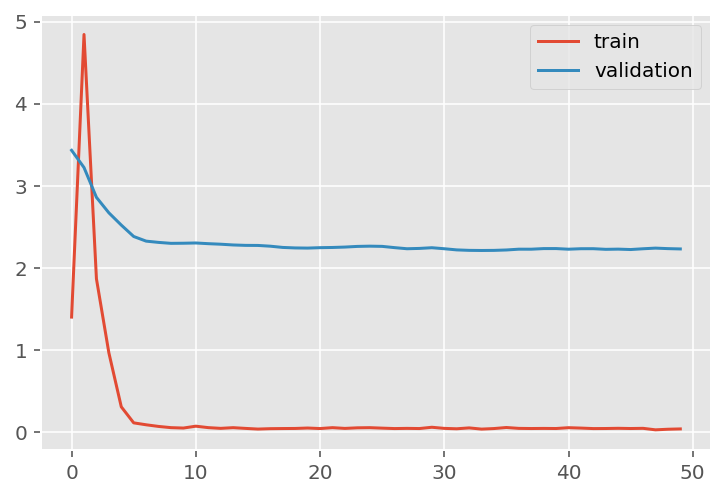

In [1444]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [1445]:
X_test

array([[[ 3.98699176e+00,  1.17200768e+00, -6.61162961e-01, ...,
         -2.17588235e+00, -1.24728261e+00, -4.20057870e+00],
        [-3.78773352e+00,  1.96955992e+00, -3.30940597e-01, ...,
          5.88823529e-01,  1.13224638e-01,  2.16979167e+00],
        [-3.43059066e+00,  2.03795319e-01, -6.61162961e-01, ...,
         -2.94705882e-01,  8.32427536e-01,  2.87349537e+00],
        [ 2.17380495e+00,  3.51657683e-01,  1.48528240e+00, ...,
         -3.05882353e+00, -4.39311594e-01, -1.35798611e+00],
        [ 1.89907967e+00, -3.34120948e-01,  2.64106067e+00, ...,
          4.47058824e+00, -1.53985507e-02,  3.47997685e+00],
        [ 1.48699176e+00, -2.60189766e+00, -1.65183005e+00, ...,
         -3.24705882e+00, -1.53985507e-02, -4.99687500e+00]],

       [[-3.78773352e+00,  1.96955992e+00, -3.30940597e-01, ...,
          5.88823529e-01,  1.13224638e-01,  2.16979167e+00],
        [-3.43059066e+00,  2.03795319e-01, -6.61162961e-01, ...,
         -2.94705882e-01,  8.32427536e-01,  2.87349

In [1446]:
y_pred = model.predict(X_test)

In [1458]:
y_train_inv_diff = pred_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv_diff = pred_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv_diff = pred_transformer.inverse_transform(y_pred)

X_test_inv = pred_transformer.inverse_transform(X_test.reshape(1, -1))

In [1448]:
y_pred_inv_diff

array([[ 12350.525 ],
       [ -4833.1655],
       [  3921.9172],
       [   629.5993],
       [  7195.963 ],
       [  2542.7751],
       [  -982.8861],
       [  2287.7363],
       [ -5855.433 ],
       [-16361.6   ],
       [  6490.28  ],
       [ -4235.623 ],
       [ 10744.329 ]], dtype=float32)

In [1460]:
X_test_inv.shape

(1, 327366)

In [1451]:
X_test_pred = []
for i in range(13):
    X_test_pred.append(X_test[i][-1][0])

X_test_pred = np.array(X_test_pred)
X_test_pred

array([ 1.48699176, -2.27674451, -2.11190934, -0.35366758, -2.08443681,
        5.47050824, -3.18333791, -0.02399725,  0.80017857, -3.8701511 ,
        2.98424451, -0.27125   ,  2.84688187])

In [1452]:
y_pred_inv = y_pred_inv_diff.cumsum().cumsum()
f = y_pred_inv + X_test_pred
f

array([ 12352.01238238,  19865.60802112,  31305.05020003,  43375.68539492,
        62638.79446944,  84453.96269574, 105270.03541209, 128385.66350275,
       145643.51892857, 146534.2860989 , 153926.85924451, 157073.6975    ,
       170971.23750687])

In [1084]:
for i in range(2):
    y_train_inv = y_train_inv_diff.cumsum()
    y_test_inv = y_test_inv_diff.cumsum()
    y_pred_inv = y_pred_inv_diff.cumsum()
    
y_train_inv
y_test_inv
y_pred_inv

array([ 4062.6   , 11268.779 , 28419.205 , 13066.856 ,  7203.04  ,
       16569.625 , 11005.369 ,  9127.706 ,  7047.8936, 19436.77  ,
       16815.525 ,  6786.631 , 17768.457 ], dtype=float32)

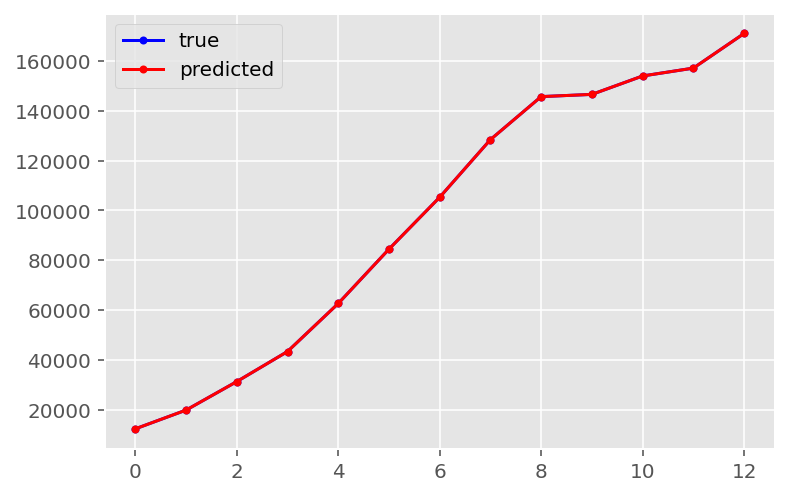

In [1456]:
plt.plot(f.flatten(), 'b', marker='.', label='true')
plt.plot(y_pred_inv.flatten(), 'r', marker='.', label='predicted')

plt.legend();

In [1086]:
y_train_inv

array([ 17000. ,  15000. ,  16000. ,  20000. ,  16500. ,  16500. ,
         8500. ,  16000. ,   9000. ,  21050. ,  35450. ,  25000. ,
        32000. ,  11423.5,  11000. ,  15576.5,  16450. ,  20550. ,
        12500. ,  23250. ,  29725. ,  13525. ,  16000. ,  11000. ,
        11000. ,   6000. ,  19500. ,  22500. ,  20000. ,  14500. ,
         8500. ,  16000. ,   8500. ,  23500. ,  23500. ,  33500. ,
        21000. ,  26000. ,  31000. ,  67225. ,  49775. ,  47000. ,
        16500. , -50500. ,  11000. ,  11000. ,  -9000. ,   3500. ,
        18500. ,  13500. ,  23500. ,  15000. ,  11475. ,   8525. ,
        13000. ,  30750. ,  -2750.5,  36000.5,   6000. ,  16000. ,
        26000. ,  56000. ,  46000. ,  29750. ,  57250. ,  11000. ,
        43500. ,  58500. ,  31000. ])

In [1087]:
y_test_inv

array([ -41000.,  -79000.,  -85000., -122500.,  -22500.,  -80000.,
        -80000.,  -65000., -135000.,  -80250.,  -84750.,  -32500.,
        -25000.])

In [1088]:
y_pred_inv

array([ 4062.6   , 11268.779 , 28419.205 , 13066.856 ,  7203.04  ,
       16569.625 , 11005.369 ,  9127.706 ,  7047.8936, 19436.77  ,
       16815.525 ,  6786.631 , 17768.457 ], dtype=float32)

In [1337]:
y_pred_inv_diff

array([[  4062.6   ],
       [  7206.179 ],
       [ 17150.426 ],
       [-15352.349 ],
       [ -5863.8164],
       [  9366.584 ],
       [ -5564.2563],
       [ -1877.663 ],
       [ -2079.8127],
       [ 12388.876 ],
       [ -2621.2437],
       [-10028.895 ],
       [ 10981.826 ]], dtype=float32)

In [1348]:
y_pred_inv_diff_flat = np.array([item for sublist in y_pred_inv_diff for item in sublist])
y_pred_inv_diff_flat

array([  4062.6   ,   7206.179 ,  17150.426 , -15352.349 ,  -5863.8164,
         9366.584 ,  -5564.2563,  -1877.663 ,  -2079.8127,  12388.876 ,
        -2621.2437, -10028.895 ,  10981.826 ], dtype=float32)

In [1353]:
y_test_inv_diff_flat = np.array([item for sublist in y_test_inv_diff for item in sublist])
y_test_inv_diff_flat

array([-41000., -38000.,  -6000., -37500., 100000., -57500.,      0.,
        15000., -70000.,  54750.,  -4500.,  52250.,   7500.])

In [1355]:
rmse = sqrt(mean_squared_error(y_test_inv_diff_flat, y_pred_inv_diff_flat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 49144.005


In [447]:
df_med_int.tail(10)

,E01000001,E01000002,E01000003,E01032739,E01032740,E01000006,E01000009,E01000010,E01000012,E01000013,...,E01004765,E01033594,E01033595,E01033596,E01033600,E01033601,E01033603,E01033606,E01033607,E01033608
2017-04-01,907500.0,1.732894,2.551899,1.660557,3.303693,1.483416,0.449406,1.067055,1.002272,1.615176,...,2.583973,3.102911,2.221505,6.551231,0.775113,1.825771,2.371341,1075000,720000,1.554342
2017-07-01,950000.0,1.650453,2.556962,1.579912,3.325007,1.470149,1.484688,1.115067,0.920845,1.593496,...,1.844628,4.246362,6.587020,6.944305,0.789016,1.774671,3.493293,1010138,735000,1.901737
2017-10-01,935000.0,1.650289,2.602532,1.596041,3.277051,1.509950,1.484688,1.120216,1.029414,1.593496,...,2.583973,3.778586,7.312945,5.194190,0.775113,1.723009,2.920122,975000,750000,2.040695
2018-01-01,920000.0,1.600989,2.551899,1.638563,3.330336,1.271144,2.190562,1.125364,0.920845,1.701897,...,1.911841,3.290021,7.181143,4.024328,1.042753,1.671347,2.005488,1010138,1627500,2.040695
2018-04-01,920000.0,1.518549,2.450633,3.552053,3.453958,1.387231,1.359893,1.137026,0.920845,1.701897,...,3.076869,3.622661,7.341422,1.722038,1.042753,1.620808,1.493293,755000,732500,2.040695
2018-07-01,850000.0,1.510305,2.250633,3.691349,3.767276,1.337479,0.519994,1.107872,1.070127,1.756098,...,3.778873,3.456341,7.341422,2.807670,1.421620,1.569707,1.688415,696000,670000,2.656079
2018-10-01,834750.0,1.584501,2.050633,3.771466,5.197988,1.204809,0.355290,1.122449,1.002272,1.756098,...,3.196359,3.290021,4.184695,2.807670,1.421620,1.518045,1.298171,610000,712500,2.417866
2019-01-01,815000.0,1.600989,1.789873,3.908358,5.316548,0.654229,0.308232,1.093294,1.178696,1.658537,...,3.614574,4.080042,3.719729,2.661672,1.393813,1.466383,2.395732,652500,637500,1.226799
2019-04-01,847500.0,1.675185,1.787342,3.771466,5.645586,0.143449,0.308232,1.055394,1.192267,1.647696,...,1.949182,3.518711,1.518889,2.661672,1.988182,1.415845,2.395732,652500,4230000,1.068867
2019-07-01,887500.0,1.749382,1.665823,4.093548,3.783262,0.723881,0.308232,0.962099,1.192267,1.737127,...,2.594428,4.080042,2.448821,1.123068,0.941953,1.364744,1.375822,652500,4450000,0.909181


In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 


In [264]:
values = df_med_int.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [265]:
n_quarters = 4
n_features = 4262

reframed = series_to_supervised(scaled, n_quarters, 1)
print(reframed.shape)

(92, 21310)


In [266]:
values = reframed.values

train_size = int(len(df_med_int) * 0.9)
test_size = len(df_med_int) - train_size

train = values[:train_size, :]
test = values[train_size:, :]
print(len(train), len(test))

86 6


In [267]:
# split into input and outputs
n_obs = n_quarters * n_features
X_train, y_train = train[:, :n_obs], train[:, -n_features]
X_test, y_test = test[:, :n_obs], test[:, -n_features]


In [268]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], n_quarters, n_features))
X_test = X_test.reshape((X_test.shape[0], n_quarters, n_features))

In [269]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(86, 4, 4262) (6, 4, 4262) (86,) (6,)


In [270]:
X_train.shape[2]

4262

In [271]:
import keras

In [272]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [273]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=6,
    validation_split=0.1,
    validation_data=(X_test, y_test),
    shuffle=False
)

Train on 86 samples, validate on 6 samples
Epoch 1/5
86/86 [==============================] - 2s 21ms/step - loss: 0.4952 - val_loss: 0.0214
Epoch 2/5
86/86 [==============================] - 1s 12ms/step - loss: 0.1589 - val_loss: 0.0670
Epoch 3/5
86/86 [==============================] - 1s 12ms/step - loss: 0.0807 - val_loss: 0.1432
Epoch 4/5
86/86 [==============================] - 1s 12ms/step - loss: 0.0696 - val_loss: 0.1775
Epoch 5/5
86/86 [==============================] - 1s 13ms/step - loss: 0.0589 - val_loss: 0.1521


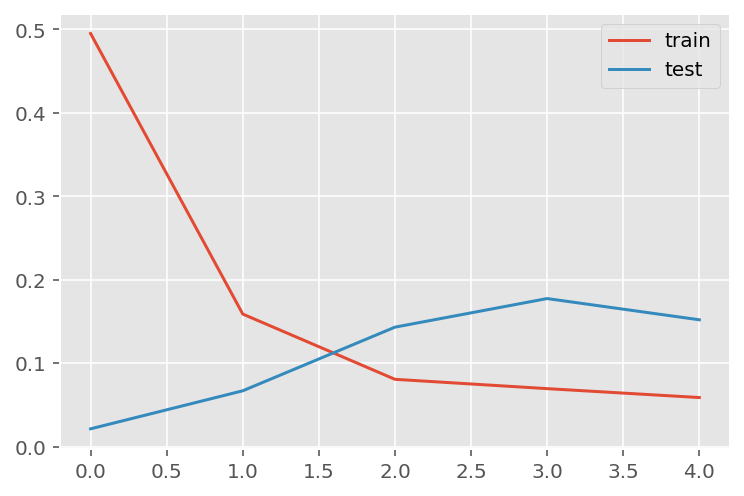

In [274]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [275]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], n_quarters*n_features))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((test_y, X_test[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

ValueError: operands could not be broadcast together with shapes (6,8) (4262,) (6,8) 

In [213]:
# make a prediction
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

NameError: name 'sqrt' is not defined

In [214]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.474


In [ ]:
y_train_inv = f_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = f_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = f_transformer.inverse_transform(y_pred)

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
pred_list = []

batch = X_train[-time_steps:].reshape((10, time_steps, n_features))
print(batch.shape)
print(batch[0])

for i in range(time_steps):
    pred_list.append(model.predict(batch)[0])
    print(pred_list[i])
    print(len(batch[:, :, :]))
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)
    
    
    

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), 
                          index=df[-n_input:].index,
                         columns=['predictions'])

df_test = pd.concat([df, df_predict], axis=1)